# Simple CNN model for CIFAR-10


In [32]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf
K.common.image_dim_ordering()

'tf'

fix random seed for reproducibility

In [2]:
seed = 7
numpy.random.seed(seed)

load data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [4]:
X_train[1:1]

array([], shape=(0, 32, 32, 3), dtype=uint8)

normalize inputs from 0-255 to 0.0-1.0

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

one hot encode outputs

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


Create the model

In [7]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

Compile model

In [8]:
epochs = 70
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [9]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

Fit the model

In [10]:
from keras.models import load_model
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=500)
model = load_model("model.h5")


Final evaluation of the model

In [11]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
# model.save('./model' + '.h5')

10000/10000 [==============================] - 3s 308us/step
Test loss: 0.7995174201011658
Test accuracy: 0.7425000071525574


In [12]:
# •	Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
# •	Dropout layer at 20%.
# •	Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
# •	Max Pool layer with size 2×2.
# •	Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
# •	Dropout layer at 20%.
# •	Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
# •	Max Pool layer with size 2×2.
# •	Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
# •	Dropout layer at 20%.
# •	Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
# •	Max Pool layer with size 2×2.
# •	Flatten layer.
# •	Dropout layer at 20%.
# •	Fully connected layer with 1024 units and a rectifier activation function.
# •	Dropout layer at 20%.
# •	Fully connected layer with 512 units and a rectifier activation function.
# •	Dropout layer at 20%.
# •	Fully connected output layer with 10 units and a softmax activation function


In [13]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

In [14]:
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [15]:
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [16]:
# model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=500)
model2 = load_model("model2.h5")


In [17]:
scores = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
# model2.save('./model2' + '.h5')

10000/10000 [==============================] - 1s 125us/step
Test loss: 2.302588798522949
Test accuracy: 0.10000000149011612


In [18]:
print(num_classes)

10


In [19]:

from keras.layers import Input, Dense,Conv2D,MaxPooling2D, Dropout,Flatten
from keras.models import Model

from keras.layers import Conv2D, MaxPooling2D, Input

input_img = Input(shape=(X_train.shape[1:]))
tower_1 = Conv2D(32, (3, 3), padding='same', activation='relu')(input_img)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(tower_1)
tower_1 = MaxPooling2D(pool_size=(2, 2))(tower_1)
tower_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(tower_1)
tower_1 = MaxPooling2D(pool_size=(2, 2))(tower_1)
tower_1 = Conv2D(128, (3, 3), activation='relu', padding='same')(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Conv2D(128, (3, 3), activation='relu', padding='same')(tower_1)
tower_1 = MaxPooling2D(pool_size=(2, 2))(tower_1)
tower_1 = Flatten()(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Dense(1024, activation='relu', kernel_constraint=maxnorm(3))(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Dense(512, activation='relu', kernel_constraint=maxnorm(3))(tower_1)
tower_1 = Dropout(0.2)(tower_1)
main_output = Dense(num_classes, activation='softmax')(tower_1)


model3 = Model(inputs = input_img, outputs = main_output)

In [20]:
print(model3.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)        0   

In [21]:
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [22]:
# model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=500)
model3 = load_model("model3.h5")


In [23]:
scores = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
# model3.save('./model3' + '.h5')

10000/10000 [==============================] - 1s 110us/step
Test loss: 2.3025868286132813
Test accuracy: 0.10000000149011612


In [1]:
import matplotlib.pyplot as plt
import random 

num_to_text = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}


prediction_idx = [random.randint(0, 10000),random.randint(0, 10000), random.randint(0, 10000), random.randint(0, 10000)]

for idx in prediction_idx:

    test_img = X_test[idx]
    test_data= X_test[[idx], :]

    plt.imshow(test_img)
    plt.title(num_to_text[model.predict_classes(test_data)[0]])
    plt.show()


NameError: name 'X_test' is not defined

In [70]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten ,Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import numpy as np
import os 
import random
import cv2
from sklearn.model_selection import train_test_split

In [71]:
categories = {'cane': 'dog', "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken",
              "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno": "spider"}
data = []
animals = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "squirrel", "spider"]
img_size = 100

for category, translate in categories.items():
    path = "/input/animals10/raw-img/" + category
    target = animals.index(translate)
    print("path:" + path)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, (img_size, img_size))
            data.append([new_img_array, target])
        except Exception as e:
            pass



path:/input/animals10/raw-img/cane
path:/input/animals10/raw-img/cavallo
path:/input/animals10/raw-img/elefante
path:/input/animals10/raw-img/farfalla
path:/input/animals10/raw-img/gallina
path:/input/animals10/raw-img/gatto
path:/input/animals10/raw-img/mucca
path:/input/animals10/raw-img/pecora
path:/input/animals10/raw-img/scoiattolo
path:/input/animals10/raw-img/ragno


In [72]:
random.shuffle(data)
x=[]
y=[]
for features,labels in data:
    x.append(features)
    y.append(labels)   
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [73]:
x_train=np.array(x_train).reshape(-1,img_size,img_size,1)
x_train=tf.keras.utils.normalize(x_train,axis=1)
y_train=np.array(y_train)


In [74]:
model4=Sequential()
model4.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = x_train.shape[1:]))
model4.add(BatchNormalization())
model4.add(Conv2D(32, kernel_size = 3, activation='relu'))
model4.add(BatchNormalization())
model4.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))
model4.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))
model4.add(Conv2D(256, kernel_size = 4, activation='relu'))
model4.add(BatchNormalization())
model4.add(Flatten())
model4.add(Dropout(0.4))
model4.add(Dense(10, activation='softmax'))          
model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [56]:
# model4.fit(x_train,y_train,epochs=50,batch_size=600)


Train on 20943 samples
Epoch 1/50
20943/20943 [==============================] - 23s 1ms/sample - loss: 4.0993 - accuracy: 0.2790
Epoch 2/50
20943/20943 [==============================] - 19s 930us/sample - loss: 3.3851 - accuracy: 0.4327
Epoch 3/50
20943/20943 [==============================] - 19s 931us/sample - loss: 2.9346 - accuracy: 0.5089
Epoch 4/50
20943/20943 [==============================] - 19s 930us/sample - loss: 2.6215 - accuracy: 0.5565
Epoch 5/50
20943/20943 [==============================] - 19s 927us/sample - loss: 2.2419 - accuracy: 0.6042
Epoch 6/50
20943/20943 [==============================] - 19s 925us/sample - loss: 1.9402 - accuracy: 0.6565
Epoch 7/50
20943/20943 [==============================] - 20s 942us/sample - loss: 1.7448 - accuracy: 0.6830
Epoch 8/50
20943/20943 [==============================] - 19s 927us/sample - loss: 1.5874 - accuracy: 0.7091
Epoch 9/50
20943/20943 [==============================] - 19s 929us/sample - loss: 1.3825 - accuracy: 0.733

In [82]:

import tensorflow as tf 
model4 = tf.keras.models.load_model('model4.h5')




In [83]:
# model4.save('./model4' + '.h5')

60.jpeg


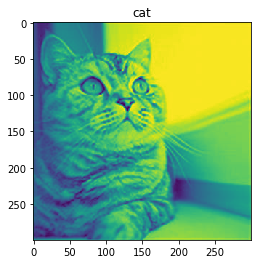

70.jpeg


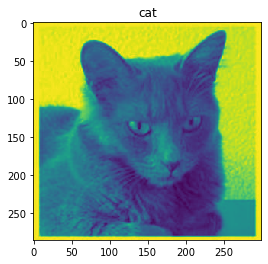

e834b50a29f4043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg


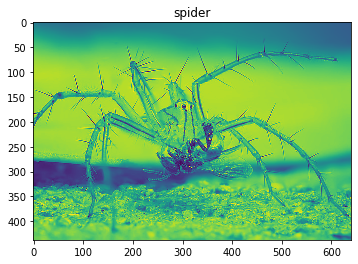

e834b50a29f4043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_6403.jpeg


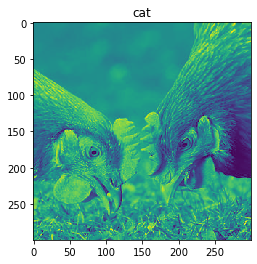

e834b70a2ff1033ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg


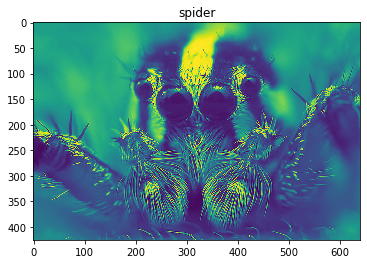

OIP--_miqJwiTIao0aZytuqccgHaFj.jpeg


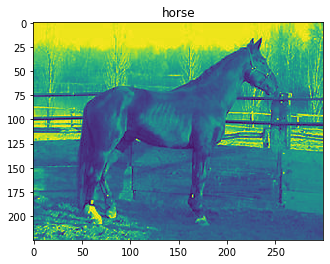

In [84]:
import matplotlib.pyplot as plt

import os

directory = "/test"
for filename in os.listdir(directory):
    print (filename)
    img_array = cv2.imread("/test/"+filename, cv2.IMREAD_GRAYSCALE)
    img_size = 100
    new_img_array = cv2.resize(img_array, (img_size, img_size))
    new_img_array

    test_images = np.array(new_img_array).reshape(-1,img_size,img_size,1)
    something = model4.predict_classes(test_images)

    animals = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "squirrel", "spider"]


    plt.imshow(img_array)
    plt.title(animals[something[0]])
    plt.show()

(100, 100)